/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


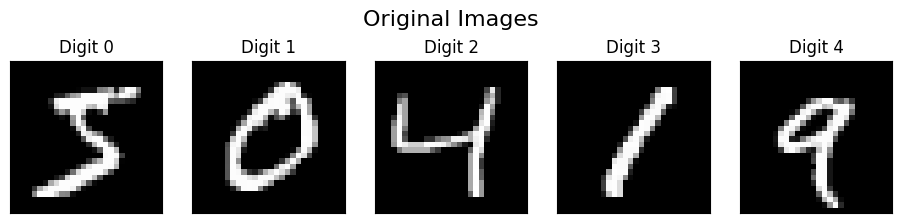

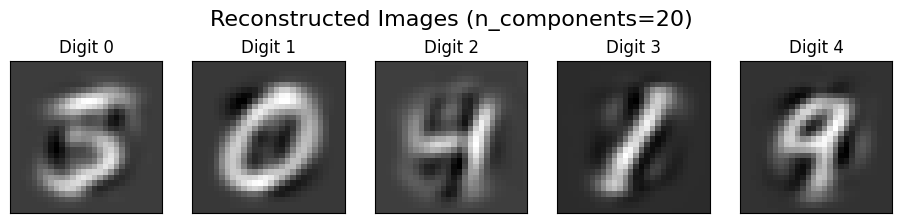

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load the MNIST dataset (or any other suitable dataset)
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64') / 255.0  # Normalize pixel values to [0, 1]

# Number of principal components to retain
n_components = 20

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Reconstruct the data
X_reconstructed = pca.inverse_transform(X_pca)

# Reshape the images for plotting
original_images = X.values.reshape((-1, 28, 28))
reconstructed_images = X_reconstructed.reshape((-1, 28, 28))

# Plot original and reconstructed images
def plot_gallery(images, n_row=5, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(f'Digit {i}')
        plt.xticks(())
        plt.yticks(())

# Display original images
plot_gallery(original_images, n_row=1, n_col=5)
plt.suptitle('Original Images', size=16)
plt.show()

# Display reconstructed images
plot_gallery(reconstructed_images, n_row=1, n_col=5)
plt.suptitle(f'Reconstructed Images (n_components={n_components})', size=16)
plt.show()
